In [19]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import math
from collections import Counter
# import numpy as np
import seaborn as sns
# import pandas as pd
import scipy.stats as ss
# import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output

In [3]:
df = pd.read_excel('Feb26FinalVersion.xlsx')

In [ ]:
# Categorize remaining default values
# Create columns for amount deciles
# Create day of week column

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
df[['Purchase Date', 'Purchase Time', 'Verification Date']].head()

,Purchase Date,Purchase Time,Verification Date
0,2020-04-29,12:47:00,2020-04-29
1,2020-04-29,02:32:00,2020-04-29
2,2020-04-28,22:44:00,2020-04-29
3,2020-04-28,13:17:00,2020-04-28
4,2020-04-26,22:23:00,2020-04-27


In [21]:
# convert PD, PT, VD to timestamps
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%y-%m-%d')

In [23]:
df['Purchase Time'] = pd.to_datetime(df['Purchase Time'], format='%H:%M:%S')

In [24]:
df['Verification Date'] = pd.to_datetime(df['Verification Date'], format='%y-%m-%d')

In [18]:
df.describe()

,Amount,Content_Word_Length
count,756.000000,756.000000
mean,-9.922738,5.452381
std,482.962404,1.472613
min,-5486.000000,2.000000
25%,-39.287500,5.000000
50%,-16.320000,5.000000
75%,-3.990000,6.000000
max,3311.310000,10.000000


In [26]:
df['Purchase Time'].dt.hour

0      12
1       2
2      22
3      13
4      22
       ..
751     0
752     0
753     0
754     0
755    11
Name: Purchase Time, Length: 756, dtype: int64

In [4]:
df

,Unnamed: 0,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
0,0,2020-04-29,12:47:00,POS PURCHASE with PIN,GIANT 0774 ARLINGTON VA 001,-5.11,2020-04-29,Groceries,5,GIANT,001,"['0774', 'ARLINGTON', 'VA']"
1,1,2020-04-29,02:32:00,Other,Person-to-Person TransferPOP*Margaret Coleman ...,250.00,2020-04-29,Extra,7,Person-to-Person,NaN,"['TransferPOP*Margaret', 'Coleman', 'Visa', 'D..."
2,2,2020-04-28,22:44:00,POS PURCHASE Non-PIN,PP*GOOGLE A MEDIUM CORP 402-935-7733 CAINC000,-4.99,2020-04-29,Entertainment,7,PP*GOOGLE,NaN,"['A', 'MEDIUM', 'CORP', '402-935-7733', 'CAINC..."
3,3,2020-04-28,13:17:00,POS PURCHASE with PIN,GIANT 0774 ARLINGTON VA 001,-5.11,2020-04-28,Groceries,5,GIANT,001,"['0774', 'ARLINGTON', 'VA']"
4,4,2020-04-26,22:23:00,POS PURCHASE Non-PIN,UBER EATS HELP.UBER.COM CA INB600,-21.23,2020-04-27,Dining Out,5,UBER,INB600,"['EATS', 'HELP.UBER.COM', 'CA']"
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2020-09-01,00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.50,2020-09-01,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
752,753,2020-09-01,00:00:00,Other,WASHINGTON GAS/PAYMENTEvan Barnes,-69.09,2020-09-01,Utilities,3,WASHINGTON,Barnes,['GAS/PAYMENTEvan']
753,754,2020-09-01,00:00:00,Other,USAA PC/PAYMENTWALTER COLEMAN Default,-181.58,2020-09-01,USAA Insurance,4,USAA,Default,"['PC/PAYMENTWALTER', 'COLEMAN']"
754,755,2020-09-01,00:00:00,VENMO,VENMO/CASHOUTWALTER COLEMAN Default,319.22,2020-09-01,Venmo Extra,3,VENMO/CASHOUTWALTER,Default,['COLEMAN']


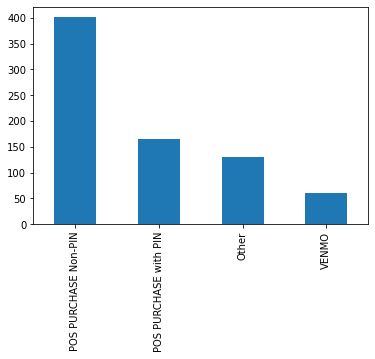

In [10]:
# plt.bar(df['Payment_Method'], height=df['Payment_Method'].value_counts)
df['Payment_Method'].value_counts().plot(kind="bar")

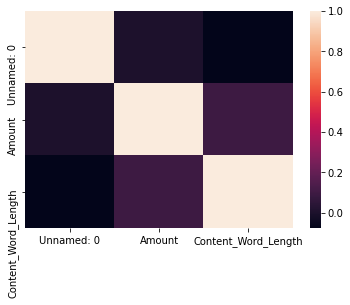

In [11]:
sns.heatmap(df.corr())

In [39]:
print(len(df[df['Purchase Time'].dt.time != dt.time(0,0,0)]['Purchase Time']))

580


In [30]:
print(len(df[df['Purchase Time'] == dt.time(0,0,0)]['Purchase Time']))

0


In [32]:
print(len(df[df['Purchase Time'] == dt.time(22,23,0)]['Purchase Time'].dt.hour))

0


In [38]:
print(len(df[df['Purchase Time'].dt.time != "00:00:00"]['Purchase Time']))

756


In [37]:
type(df['Purchase Time'].dt.time)

pandas.core.series.Series

In [40]:
scat_df = df[df['Purchase Time'].dt.time != dt.time(0,0,0)][['Purchase Time','Amount']]

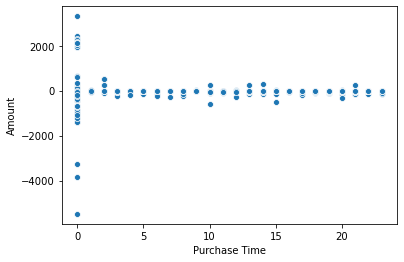

In [28]:
sns.scatterplot(df[df['Purchase Time'] != dt.time(22,23,0)]['Purchase Time'].dt.hour, df['Amount'])

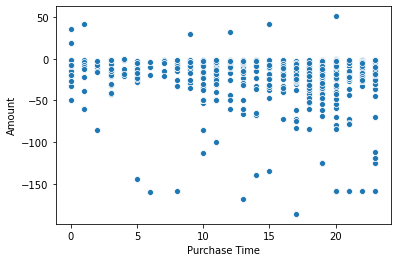

In [45]:
sns.scatterplot(scat_df['Purchase Time'].dt.hour, scat_df[(scat_df['Amount'] < 200) & (scat_df['Amount'] > -200)]\
                ['Amount'])

In [46]:
defaults = df[df['Category'] == 'Default'].copy()

In [47]:
defaults

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
16,2020-04-21,1900-01-01 01:58:00,POS PURCHASE Non-PIN,LCA*LABCORP 8008456167 800-845-6167 NCIN7200,-21.82,2020-04-21,Default,5,LCA*LABCORP,NaN,"['8008456167', '800-845-6167', 'NCIN7200']"
51,2020-04-09,1900-01-01 03:45:00,POS PURCHASE Non-PIN,PAYPAL *EDX INC 402-935-7733 MAINC000,-255.00,2020-04-10,Default,6,PAYPAL,NaN,"['*EDX', 'INC', '402-935-7733', 'MAINC000']"
60,2020-04-07,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
...,...,...,...,...,...,...,...,...,...,...,...
731,2020-09-05,1900-01-01 19:37:00,POS PURCHASE Non-PIN,Subway 20695 Woodstock VA 754736,-9.13,2020-09-08,Default,5,Subway,754736,"['20695', 'Woodstock', 'VA']"
732,2020-09-05,1900-01-01 13:11:00,POS PURCHASE Non-PIN,WM SUPERCENTER # WOODSTOCK VA 264700,-14.66,2020-09-08,Default,6,WM,264700,"['SUPERCENTER', '#', 'WOODSTOCK', 'VA']"
733,2020-09-05,1900-01-01 11:40:00,POS PURCHASE Non-PIN,TST* HOLY COW 703-666-8616 VA 010966,-13.04,2020-09-08,Default,6,TST*,010966,"['HOLY', 'COW', '703-666-8616', 'VA']"
741,2020-09-03,1900-01-01 10:31:00,POS PURCHASE with PIN,MAIN STORE 1100 ARLINGTON VA 900708,-37.99,2020-09-03,Default,6,MAIN,900708,"['STORE', '1100', 'ARLINGTON', 'VA']"


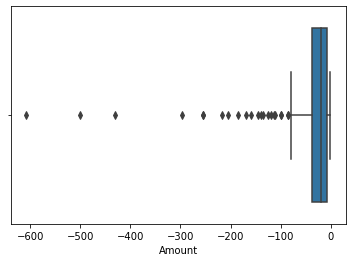

In [50]:
sns.boxplot(defaults['Amount'])

In [51]:
# average of dining out
df[df['Category'] == 'Dining Out']['Amount'].mean()

-12.49021126760563

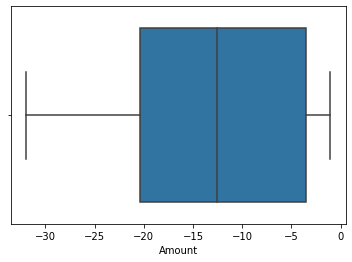

In [52]:
sns.boxplot(df[df['Category'] == 'Dining Out']['Amount'])

In [53]:
df[df['Category'] == 'Dining Out']['Amount'].sum()

-1773.61

In [54]:
defaults['Amount'].sum()

-7544.179999999999

In [55]:
defaults

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
16,2020-04-21,1900-01-01 01:58:00,POS PURCHASE Non-PIN,LCA*LABCORP 8008456167 800-845-6167 NCIN7200,-21.82,2020-04-21,Default,5,LCA*LABCORP,NaN,"['8008456167', '800-845-6167', 'NCIN7200']"
51,2020-04-09,1900-01-01 03:45:00,POS PURCHASE Non-PIN,PAYPAL *EDX INC 402-935-7733 MAINC000,-255.00,2020-04-10,Default,6,PAYPAL,NaN,"['*EDX', 'INC', '402-935-7733', 'MAINC000']"
60,2020-04-07,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
...,...,...,...,...,...,...,...,...,...,...,...
731,2020-09-05,1900-01-01 19:37:00,POS PURCHASE Non-PIN,Subway 20695 Woodstock VA 754736,-9.13,2020-09-08,Default,5,Subway,754736,"['20695', 'Woodstock', 'VA']"
732,2020-09-05,1900-01-01 13:11:00,POS PURCHASE Non-PIN,WM SUPERCENTER # WOODSTOCK VA 264700,-14.66,2020-09-08,Default,6,WM,264700,"['SUPERCENTER', '#', 'WOODSTOCK', 'VA']"
733,2020-09-05,1900-01-01 11:40:00,POS PURCHASE Non-PIN,TST* HOLY COW 703-666-8616 VA 010966,-13.04,2020-09-08,Default,6,TST*,010966,"['HOLY', 'COW', '703-666-8616', 'VA']"
741,2020-09-03,1900-01-01 10:31:00,POS PURCHASE with PIN,MAIN STORE 1100 ARLINGTON VA 900708,-37.99,2020-09-03,Default,6,MAIN,900708,"['STORE', '1100', 'ARLINGTON', 'VA']"


In [56]:
defaults['Amount'].min()

-608.69

In [57]:
defaults.sort_values(['Amount'])

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
174,2020-12-30,1900-01-01 10:02:00,POS PURCHASE with PIN,MIDAS. ARLINGTON VA 399971,-608.69,2020-12-30,Default,4,MIDAS.,399971,"['ARLINGTON', 'VA']"
595,2020-10-30,1900-01-01 15:44:00,POS PURCHASE with PIN,CALIBER COLLISION 1706 ARLINGTON VA088816,-500.00,2020-10-30,Default,6,CALIBER,NaN,"['COLLISION', '1706', 'ARLINGTON', 'VA088816']"
76,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-430.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
577,2020-05-06,1900-01-01 12:05:00,POS PURCHASE Non-PIN,PILLAR DC WWW.PILLARDC. DC R0HMXQ,-295.94,2020-05-06,Default,5,PILLAR,R0HMXQ,"['DC', 'WWW.PILLARDC.', 'DC']"
51,2020-04-09,1900-01-01 03:45:00,POS PURCHASE Non-PIN,PAYPAL *EDX INC 402-935-7733 MAINC000,-255.00,2020-04-10,Default,6,PAYPAL,NaN,"['*EDX', 'INC', '402-935-7733', 'MAINC000']"
...,...,...,...,...,...,...,...,...,...,...,...
654,2020-10-04,1900-01-01 20:34:00,POS PURCHASE Non-PIN,USA*VEND AT AIR SERV FARMVILLE VAIN0700,-1.75,2020-10-05,Default,7,USA*VEND,NaN,"['AT', 'AIR', 'SERV', 'FARMVILLE', 'VAIN0700']"
388,2020-07-10,1900-01-01 20:26:00,POS PURCHASE Non-PIN,USA*VEND AT AIR SERV ARLINGTON VAINC800,-1.75,2020-07-13,Default,7,USA*VEND,NaN,"['AT', 'AIR', 'SERV', 'ARLINGTON', 'VAINC800']"
452,2020-06-14,1900-01-01 14:41:00,POS PURCHASE Non-PIN,CROWNE*1 PLAZA NATIONAL R ARLINGTON VA69,-1.69,2020-06-15,Default,7,CROWNE*1,NaN,"['PLAZA', 'NATIONAL', 'R', 'ARLINGTON', 'VA69']"
199,2020-12-22,1900-01-01 19:39:00,Other,POS PURCHASE FEEITA FEES PAYPAL *MYPROTEIN 353...,-1.06,2020-12-23,Default,9,POS,NaN,"['PURCHASE', 'FEEITA', 'FEES', 'PAYPAL', '*MYP..."


In [58]:
df.loc[174, 'Category'] = 'Misc'

In [59]:
df.loc[[595,51], 'Category'] = 'Misc'

In [60]:
defaults.sort_values('Amount')

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
174,2020-12-30,1900-01-01 10:02:00,POS PURCHASE with PIN,MIDAS. ARLINGTON VA 399971,-608.69,2020-12-30,Default,4,MIDAS.,399971,"['ARLINGTON', 'VA']"
595,2020-10-30,1900-01-01 15:44:00,POS PURCHASE with PIN,CALIBER COLLISION 1706 ARLINGTON VA088816,-500.00,2020-10-30,Default,6,CALIBER,NaN,"['COLLISION', '1706', 'ARLINGTON', 'VA088816']"
76,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-430.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
577,2020-05-06,1900-01-01 12:05:00,POS PURCHASE Non-PIN,PILLAR DC WWW.PILLARDC. DC R0HMXQ,-295.94,2020-05-06,Default,5,PILLAR,R0HMXQ,"['DC', 'WWW.PILLARDC.', 'DC']"
51,2020-04-09,1900-01-01 03:45:00,POS PURCHASE Non-PIN,PAYPAL *EDX INC 402-935-7733 MAINC000,-255.00,2020-04-10,Default,6,PAYPAL,NaN,"['*EDX', 'INC', '402-935-7733', 'MAINC000']"
...,...,...,...,...,...,...,...,...,...,...,...
654,2020-10-04,1900-01-01 20:34:00,POS PURCHASE Non-PIN,USA*VEND AT AIR SERV FARMVILLE VAIN0700,-1.75,2020-10-05,Default,7,USA*VEND,NaN,"['AT', 'AIR', 'SERV', 'FARMVILLE', 'VAIN0700']"
388,2020-07-10,1900-01-01 20:26:00,POS PURCHASE Non-PIN,USA*VEND AT AIR SERV ARLINGTON VAINC800,-1.75,2020-07-13,Default,7,USA*VEND,NaN,"['AT', 'AIR', 'SERV', 'ARLINGTON', 'VAINC800']"
452,2020-06-14,1900-01-01 14:41:00,POS PURCHASE Non-PIN,CROWNE*1 PLAZA NATIONAL R ARLINGTON VA69,-1.69,2020-06-15,Default,7,CROWNE*1,NaN,"['PLAZA', 'NATIONAL', 'R', 'ARLINGTON', 'VA69']"
199,2020-12-22,1900-01-01 19:39:00,Other,POS PURCHASE FEEITA FEES PAYPAL *MYPROTEIN 353...,-1.06,2020-12-23,Default,9,POS,NaN,"['PURCHASE', 'FEEITA', 'FEES', 'PAYPAL', '*MYP..."


In [61]:
defaults = df[df['Category'] == 'Default'].copy()

In [62]:
len(defaults)

169

In [63]:
df.loc[76, "Category"] = "Tithe"

In [64]:
df.loc[577, "Category"] = "Tithe"

In [65]:
for cat in df[df['Category'] == 'Default'][['Purchase Date','First_Word','Amount']]:
    print("Content", cat)
    print("Category is: ")
    inp = input()
    df.loc[df['Content'] == cat, 'Category'] = inp

Content Purchase Date
Category is: 


KeyboardInterrupt: Interrupted by user

In [68]:
for x in zip(df[df['Category'] == 'Default'][['Purchase Date','First_Word','Amount']]):
    print(x)

('Purchase Date',)
('First_Word',)
('Amount',)


In [69]:
for cat in df[df['Category'] == 'Default']['Content']:
    print("Content", cat)
    print("Category is: ")
    inp = input()
    df.loc[df['Content'] == cat, 'Category'] = inp

Content LCA*LABCORP 8008456167 800-845-6167 NCIN7200 
Category is: 
Medical
Content VENMO/PAYMENTWALTER COLEMAN Default
Category is: 
Default
Content VENMO/PAYMENTWALTER COLEMAN Default
Category is: 
Default
Content VENMO/PAYMENTWALTER COLEMAN*1 Default
Category is: 
Default
Content PAYPAL *MICROSOFT STORE 402-935-7733 WAINP700 
Category is: 
Default
Content BEAR CHASE BREWING COMP BLUEMONT VAIN7200 
Category is: 
Dining Out
Content CELEBRATIONS BY RUPA VI ASHBURN VAINC700 
Category is: 
Dining Out
Content PENROSE SQUARE ARLINGTON VA Square
Category is: 
Default
Content PAYPAL *EDX INC 402-935-7733 MAIN7400 
Category is: 
Misc
Content PAYPAL *RUSTAMKO 4029357733 CAIN8000 
Category is: 
Default
Content WONDEE SIAM NEW YORK NY IN6600
Category is: 
Dining Out
Content LITTLE ITALY PIZZA NEW YORK NY062031 
Category is: 
Dining Out
Content TAL BAGELS NEW YORK NY 585831
Category is: 
Dining Out
Content SY8 THE KOSHER MARK0002 NEW YORK NY0000B8 
Category is: 
Dining Out
Content PRICELN*DAYS IN

Groceries
Content PAYPAL *HOME DEPOT 402-935-7733 GAINB200 
Category is: 
Misc
Content CVS/PHARMACY #02 02142- ALRINGTON VA999999 
Category is: 
Groceries
Content VENMO/PAYMENTWALTER COLEMAN Default
Category is: 
Default
Content CITY KABOB ARLINGTON VA 000007
Category is: 
Dining Out
Content TAKOHACHI JAPANESE REST ARLINGTON VAIN8800 
Category is: 
Dining Out
Content 7-ELEVEN ANNANDALE VA 00M6LQ
Category is: 
Groceries
Content THAI SQUARE ARLINGTON VA IN1200
Category is: 
Dining Out
Content VENMO/PAYMENTWALTER COLEMAN Default
Category is: 
Default
Content VENMO/PAYMENTWALTER COLEMAN Default
Category is: 
Default
Content AMAZON.COM*M76UM5JV0 AM AMZN.COM/BILL WAIN0800 
Category is: 
Misc
Content UberAT_EATS 800-5928996 CA IN4400
Category is: 
Dining
Content PAYPAL *RUSTAMKO 4029357733 CAINC600 
Category is: 
Default
Content AMAZON.COM*C72902KX3 AM AMZN.COM/BILL WAIN8900 
Category is: 
Misc
Content VTG*Emmaus*1 Family Couns 703-7292822 VA000000 
Category is: 
Medical
Content DEPARTMENT MO

In [71]:
df[df['Category'] == "Default"]

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
19,2020-04-20,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-04-20,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
60,2020-04-07,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
76,2020-04-02,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-430.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
81,2020-08-31,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-08-31,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
82,2020-08-30,1900-01-01 23:15:00,POS PURCHASE Non-PIN,PAYPAL *MICROSOFT STORE 402-935-7733 WAINP700,-69.99,2020-08-31,Default,6,PAYPAL,NaN,"['*MICROSOFT', 'STORE', '402-935-7733', 'WAINP..."
87,2020-08-30,1900-01-01 12:42:00,POS PURCHASE with PIN,PENROSE SQUARE ARLINGTON VA Square,-26.00,2020-08-31,Default,5,PENROSE,Square,"['SQUARE', 'ARLINGTON', 'VA']"
89,2020-08-30,1900-01-01 08:39:00,POS PURCHASE Non-PIN,PAYPAL *RUSTAMKO 4029357733 CAIN8000,-5.75,2020-08-31,Default,5,PAYPAL,NaN,"['*RUSTAMKO', '4029357733', 'CAIN8000']"
161,2020-08-03,1900-01-01 00:00:00,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-25.00,2020-08-03,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [73]:
df.loc[(df['Category'] == "Default") & (df["First_Word"] != "VENMO/PAYMENTWALTER"), "Category"] = "Misc"

In [74]:
df[df['Category'] == "Default"]

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
19,2020-04-20,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-04-20,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
60,2020-04-07,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
76,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-430.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
81,2020-08-31,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-08-31,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
161,2020-08-03,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-25.00,2020-08-03,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
185,2020-12-28,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-38.00,2020-12-28,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
187,2020-12-28,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-40.00,2020-12-28,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
195,2020-12-23,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-14.00,2020-12-23,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [76]:
df[(df['Category'] == "Default") & (df['Amount'] < -500)]

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
19,2020-04-20,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-04-20,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
81,2020-08-31,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-08-31,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
196,2020-12-23,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-845.00,2020-12-23,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
271,2021-01-20,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-845.00,2021-01-20,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
366,2020-07-22,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-07-22,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
425,2020-06-22,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-06-22,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
498,2020-03-23,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-03-23,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
532,2020-05-26,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-05-26,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
618,2020-10-22,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-10-22,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
687,2020-09-21,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-668.75,2020-09-21,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [78]:
df.loc[(df['Category'] == "Default") & (df['Amount'] < -500), 'Category'] = 'Rent'

In [80]:
type(df['Purchase Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
df[df['Category'] == "Default"]

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
60,2020-04-07,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
76,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-430.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
161,2020-08-03,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-25.00,2020-08-03,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
185,2020-12-28,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-38.00,2020-12-28,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
187,2020-12-28,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-40.00,2020-12-28,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
195,2020-12-23,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-14.00,2020-12-23,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
207,2020-12-21,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-24.66,2020-12-21,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
208,2020-12-21,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-53.18,2020-12-21,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [82]:
df.loc[[705,76],'Category'] = 'Tithe'

In [83]:
df[df['Category'] == 'Default'].sort_values('Purchase Date')

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
500,2020-03-23,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-37.99,2020-03-23,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
485,2020-03-27,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-22.00,2020-03-27,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
481,2020-03-30,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-6.00,2020-03-30,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
74,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
75,2020-04-02,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN*1 Default,-4.00,2020-04-02,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN*1']
60,2020-04-07,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-5.80,2020-04-07,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
542,2020-05-21,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-58.07,2020-05-21,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
518,2020-05-29,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-4.00,2020-05-29,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
393,2020-07-08,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-6.00,2020-07-08,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
360,2020-07-24,1900-01-01,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-35.01,2020-07-24,Default,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [84]:
df[df['Category'] == 'Default'].to_csv('venmo_defaults.csv')

In [87]:
df[df['Category'] == 'Default'].sort_values('Purchase Date',ascending=False)['Purchase Date']

270   2021-01-20
275   2021-01-06
185   2020-12-28
187   2020-12-28
195   2020-12-23
207   2020-12-21
208   2020-12-21
224   2020-12-15
225   2020-12-15
249   2020-12-07
632   2020-10-14
635   2020-10-13
751   2020-09-01
161   2020-08-03
349   2020-07-30
360   2020-07-24
393   2020-07-08
518   2020-05-29
542   2020-05-21
60    2020-04-07
74    2020-04-02
75    2020-04-02
481   2020-03-30
485   2020-03-27
500   2020-03-23
Name: Purchase Date, dtype: datetime64[ns]

In [89]:
for date in df[df['Category'] == 'Default'].sort_values('Purchase Date',ascending=False)['Purchase Date']:
    print("Venmo Date", date)
    print("Category is: ")
    inp = input()
    df.loc[(df['Category'] == 'Default') & df['Purchase Date'] == dt.date(date), 'Category'] = inp

Venmo Date 2021-01-20 00:00:00
Category is: 
Utilities


AssertionError: 

In [92]:
venmo_df = pd.read_csv('venmo_defaults.csv')

In [93]:
venmo_df

,Unnamed: 0,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
0,270,1/20/2021,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-48.22,1/20/2021,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
1,275,1/6/2021,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-26.12,1/6/2021,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
2,185,12/28/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-38.00,12/28/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
3,187,12/28/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-40.00,12/28/2020,Groceries,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
4,195,12/23/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-14.00,12/23/2020,Dining Out,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
5,207,12/21/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-24.66,12/21/2020,Misc,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
6,208,12/21/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-53.18,12/21/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
7,224,12/15/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-48.00,12/15/2020,Misc,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
8,225,12/15/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-24.07,12/15/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
9,249,12/7/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-37.50,12/7/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [94]:
venmo_df.index = venmo_df['Unnamed: 0']

In [97]:
venmo_df.index.name = ''

In [98]:
venmo_df.drop('Unnamed: 0', axis=1, inplace=True)

In [100]:
venmo_df

,Purchase Date,Purchase Time,Payment_Method,Content,Amount,Verification Date,Category,Content_Word_Length,First_Word,Last_Word,Middle_Words
,,,,,,,,,,,
270,1/20/2021,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-48.22,1/20/2021,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
275,1/6/2021,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-26.12,1/6/2021,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
185,12/28/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-38.00,12/28/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
187,12/28/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-40.00,12/28/2020,Groceries,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
195,12/23/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-14.00,12/23/2020,Dining Out,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
207,12/21/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-24.66,12/21/2020,Misc,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
208,12/21/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-53.18,12/21/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
224,12/15/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-48.00,12/15/2020,Misc,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']
225,12/15/2020,1/1/1900,VENMO,VENMO/PAYMENTWALTER COLEMAN Default,-24.07,12/15/2020,Utilities,3,VENMO/PAYMENTWALTER,Default,['COLEMAN']


In [101]:
df[df['Category'] == 'Default'].sort_values('Purchase Date',ascending=False),'Purchase Date']

270   2021-01-20
275   2021-01-06
185   2020-12-28
187   2020-12-28
195   2020-12-23
207   2020-12-21
208   2020-12-21
224   2020-12-15
225   2020-12-15
249   2020-12-07
632   2020-10-14
635   2020-10-13
751   2020-09-01
161   2020-08-03
349   2020-07-30
360   2020-07-24
393   2020-07-08
518   2020-05-29
542   2020-05-21
60    2020-04-07
74    2020-04-02
75    2020-04-02
481   2020-03-30
485   2020-03-27
500   2020-03-23
Name: Purchase Date, dtype: datetime64[ns]

In [106]:
df = df.sort_values('Purchase Date', ascending=False)

In [109]:
df.loc[df['Category'] == 'Default', 'Category'] = venmo_df['Category']

In [110]:
df.groupby('Category').sum()

,Amount,Content_Word_Length
Category,,
Dining,-25.87,4
Dining Out,-3132.00,1269
Entertainment,-159.60,114
Extra,7374.88,186
Gas,-435.66,94
Groceries,-3712.85,918
Gym,-1567.30,85
Medical,-2100.82,178
Misc,-5880.98,479


In [111]:
df.loc[df['Category'] == 'Dining', 'Category'] = 'Dining Out'

In [112]:
df.groupby('Category').sum()

,Amount,Content_Word_Length
Category,,
Dining Out,-3157.87,1273
Entertainment,-159.60,114
Extra,7374.88,186
Gas,-435.66,94
Groceries,-3712.85,918
Gym,-1567.30,85
Medical,-2100.82,178
Misc,-5880.98,479
Pay Check,41174.93,96


In [114]:
df['Purchase Time']

267   1900-01-01 00:00:00
268   1900-01-01 00:00:00
269   1900-01-01 00:00:00
271   1900-01-01 00:00:00
270   1900-01-01 00:00:00
              ...        
342   1900-01-01 18:32:00
343   1900-01-01 11:53:00
344   1900-01-01 02:28:00
345   1900-01-01 10:02:00
346   1900-01-01 21:00:00
Name: Purchase Time, Length: 756, dtype: datetime64[ns]

In [116]:
df.to_excel('bank_statements_categorized.xlsx')